In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import time
#import tensorflow as tf

In [ ]:
#File loading
d = np.array(pd.read_csv('/content/gdrive/My Drive/ML_datasets/train.csv'))

random.shuffle(d)

#Training data::
x_train = d[:39000,1:]
x_train = np.array(x_train)
#x_train = x_train.T

"""x_avg = np.sum(x_train, axis=0, keepdims=True)/39000
x_train = x_train.astype(float)
x_train -= x_avg"""
"""x_sig = x_train**2
x_sig = np.sum(x_sig, axis=0, keepdims=True)/39000
x_train /= x_sig"""
x_train = x_train/255
print(x_train.shape)

y_train = d[:39000,0]
y_train = np.array([y_train])
#print(y_train.shape)

#Testing data::
x_test = d[39000:,1:]
x_test = np.array(x_test)
#x_test = x_test.T

"""x_avg = np.sum(x_test, axis=0, keepdims=True)/3000
x_test = x_test.astype(float)
x_test -= x_avg"""
"""x_sig = x_test**2
x_sig = np.sum(x_sig, axis=0, keepdims=True)/3000
x_test /= x_sig"""
x_test = x_test/255
print(x_test.shape)

y_test = d[39000:,0]
y_test = np.array([y_test])
print(y_test.shape)


(39000, 784)
(3000, 784)
(1, 3000)


In [ ]:
class RBM:
    
    
    def __init__(self, visible_neurons, hidden_neurons):
        self.para = {}
        self.para["b"] = -0.4 * np.ones((1, hidden_neurons))
        self.para["c"] = np.zeros((1, visible_neurons))
        self.para["w"] = np.random.randn(hidden_neurons, visible_neurons) * 0.1
        
        
        
        
        
    #Trainning::
    def train(self, batch_size, alpha, k, iterations, epochs):
        tic = time.time()
        
        for j in range(epochs):
            
            for i in range(0, (int)(np.size(x_train,0)/batch_size), batch_size):
                
                xt = x_train[i:i+batch_size, :]
            
                xt1 = xt
                
                for c in range(iterations):
                    # GIBBS SAMPLING::
                    
                    for d in range(k):
                        h = self.sigmoid((np.dot(xt1,self.para["w"].T)+self.para["b"]))
                        h = np.array(h)
                        h.astype(float)
                        
                        #For using hidden layer with binary units:: 
                        '''rand = np.random.rand(np.size(h,0), np.size(h,1))
                        rand = np.array(rand)
                        h = np.where(h>rand, 1.0, 0.0)'''
                        
                        x_ = self.sigmoid((np.dot(h,self.para["w"])+self.para["c"]))
                        xt1 = x_
                    
                    #Parameter Updation::
                    
                    hxt = np.array(self.sigmoid(np.dot(xt,self.para["w"].T) + self.para["b"])) # Hidden values given training data.
                    hx_ = np.array(self.sigmoid(np.dot(xt1,self.para["w"].T) + self.para["b"]))# Hidden values given data after k gibbs sampling.
                    
                    self.para["w"] = self.para["w"] + alpha*(np.dot(hxt.T, xt) - np.dot(hx_.T, xt1))
                    
                    self.para["b"] = self.para["b"] + alpha*(hxt - hx_)
                        #Averaging over All Training Examples::
                    self.para["b"] = np.sum(self.para["b"], axis=0, keepdims=True)
                    self.para["b"] = self.para["b"]/batch_size
                    
                    self.para["c"] = self.para["c"] + alpha*(xt - xt1)
                        #Averaging over All Training Examples::
                    self.para["c"] = np.sum(self.para["c"], axis=0, keepdims=True)
                    self.para["c"] = self.para["c"]/batch_size
                    
        toc = time.time()            
        print("Training time: "+str((toc-tic)/60))         
        
        
        
        
                        
     
    #Testing::
    def test(self, a):
        x_test1 = np.array(x_test[a:a+1,:])
        
        #For cutting the input image::
        for i in range(392, 784):
          x_test1[0,i]=0.0
          
        ht1 = self.sigmoid(np.dot(x_test1,self.para["w"].T)+self.para["b"])
        ht1 = np.array(ht1)
        ht1.astype(float)
        
        #For using hidden layer with binary units::
        '''rand = np.random.rand(np.size(ht1,0), np.size(ht1,1))
        rand = np.array(rand)
        ht1 = np.where(ht1>rand,1.0,0.0)'''
        
        x_ = self.sigmoid(np.dot(ht1,self.para["w"])+self.para["c"])
        x_ = x_
        
        plt.imshow(x_test1.reshape(28,28), "gray")
        plt.show()
        plt.imshow(x_.reshape(28,28), "gray")

     
    
    
    #Activation Function::
    def sigmoid(self, x, derivative=False):
        if (derivative == True):
            return x * (1 - x)
        return 1.0/ (1.0 + (np.exp(-x).astype(float)))        
    
    

In [ ]:
rs = RBM(784, 250) #Initializing weights and biases.

In [ ]:
rs.train(batch_size=100, alpha=0.006, k=100, iterations=5, epochs=100)

Training time: 24.429541778564452


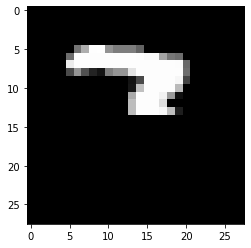

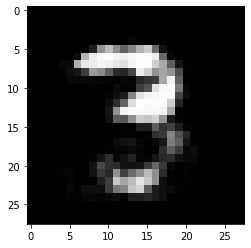

In [ ]:
 rs.test(140)